<a href="https://colab.research.google.com/github/SagarSitaula1/Data-Visual/blob/main/Exam1_CPSMA_4313.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sagar Sitaula, Exam 1

# CPSMA 4313

# SOURCE USED

1) https://github.com/nurfnick/Data_Viz/blob/main/12_GatheringConclusion.ipynb

2) https://github.com/nurfnick/Data_Viz

3)https://github.com/SagarSitaula1/Data-Visual

4)https://www.geeksforgeeks.org/using-matplotlib-with-jupyter-notebook/


I attest that the resources above were the only ones utilized in completing the exam and the work included is my own and no one else from the course.

Before starting with the code and cool data visualization, I am going to import different librieries needed for the completion of the project. 

In [1]:
from matplotlib import pyplot as plt 
import requests
import pandas as pd
from bs4 import BeautifulSoup

Now that I have imported the required libraries, I will be working on the the table of 8000km mountains from the wikipedia page. 

In [2]:
r = requests.get('https://en.wikipedia.org/wiki/List_of_mountains_by_elevation')
html_contents = r.text
html_soup = BeautifulSoup(html_contents,"lxml")



Now, that I have sucessfully requested to use the data from the wikipedia page, I am going to see the lenght of the table and then store the data as panda dataframe.

In [3]:
len(html_soup.find_all('table'))

9

In [4]:
tables = html_soup.find_all('table',class_="wikitable")

df = pd.read_html(str(tables))[0]
df

,Mountain,Metres,Feet,Range,Location and Notes
0,Mount Everest,8849,29032,Himalayas,Nepal/China
1,K2,8611,28251,Karakoram,Pakistan/China
2,Kangchenjunga,8586,28169,Himalayas,Nepal/India
3,Lhotse,8516,27940,Himalayas,Nepal – Climbers ascend Lhotse Face in climbin...
4,Makalu,8485,27838,Himalayas,Nepal
5,Cho Oyu,8188,26864,Himalayas,"Nepal – Considered ""easiest"" eight-thousander"
6,Dhaulagiri,8167,26795,Himalayas,Nepal – Presumed world's highest from 1808-1838
7,Manaslu,8163,26781,Himalayas,Nepal
8,Nanga Parbat,8126,26660,Himalayas,Pakistan
9,Annapurna,8091,26545,Himalayas,Nepal – First eight-thousander to be climbed (...


There are 9 tables stored as a list and, I can see all mountains that are above 8000m above, and to no suprise there are 8 mountains that are above 8000m in Nepal.And from the table I can see the columns looks right, so I am not leave the table as it is.

Now, for the next part I am going to see only those mountains in the Himalayas.For that I am going to use query to grab the mountains only in himalayas.

In [5]:
df.query('Range == "Himalayas"')

,Mountain,Metres,Feet,Range,Location and Notes
0,Mount Everest,8849,29032,Himalayas,Nepal/China
2,Kangchenjunga,8586,28169,Himalayas,Nepal/India
3,Lhotse,8516,27940,Himalayas,Nepal – Climbers ascend Lhotse Face in climbin...
4,Makalu,8485,27838,Himalayas,Nepal
5,Cho Oyu,8188,26864,Himalayas,"Nepal – Considered ""easiest"" eight-thousander"
6,Dhaulagiri,8167,26795,Himalayas,Nepal – Presumed world's highest from 1808-1838
7,Manaslu,8163,26781,Himalayas,Nepal
8,Nanga Parbat,8126,26660,Himalayas,Pakistan
9,Annapurna,8091,26545,Himalayas,Nepal – First eight-thousander to be climbed (...
13,Shishapangma,8027,26335,Himalayas,China


On the above table I used query function and listed all the mountains in the Himalayas range. And, I can see out the 13 mountains there are 10 mountains that falls on the himalayan range.

Now I will be creating barchart on the ranges.

In [6]:
bardf = df.groupby('Range')

Range
Himalayas    AxesSubplot(0.125,0.125;0.775x0.755)
Karakoram    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

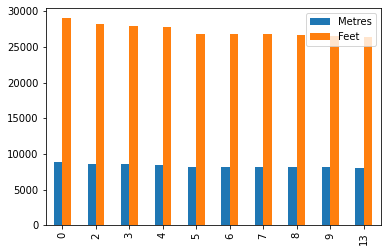

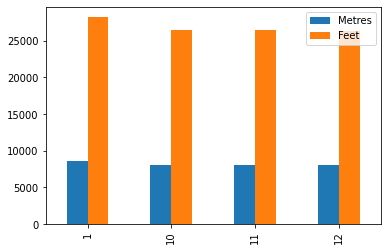

In [7]:
bardf.plot(kind='bar')

On the code above I have used the groupby function to select only Range column from the table. I have stored them in bardf and using the plot function created a bar chart. The chart look really cool, but I am not sure why it printed two char, but on the first chart I can see the difference of 2 on the y-axis, whereas difference of 10 in the second chart.



Now, I will be creating the box-plot of the height in feet.

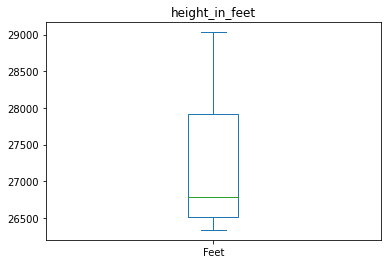

In [8]:
df['Feet'].plot(kind='box', title='height_in_feet')




Here, I used the function plot to and kind box to create a box plot.

Now, I am going to look at the summary of the column Feet. Mean,Median,std deviation and the percentage quartiles can be seen on the summary.

In [9]:
df.Feet.describe()

count       14.000000
mean     27178.214286
std        879.975452
min      26335.000000
25%      26518.000000
50%      26788.000000
75%      27914.500000
max      29032.000000
Name: Feet, dtype: float64

In [20]:
df.groupby('Range').std()

,Metres,Feet
Range,,
Himalayas,270.317838,886.891757
Karakoram,278.456909,913.363382


In [10]:
df.groupby('Range').mean()


,Metres,Feet
Range,,
Himalayas,8319.80,27295.9
Karakoram,8194.25,26884.0


In [11]:
df.groupby('Range').median()

,Metres,Feet
Range,,
Himalayas,8177.5,26829.5
Karakoram,8065.5,26461.5


After, looking at the five summary of Feet, I am going to look at the mean and median of the Range.

## BIG QUERY

At, the first before begining the bif query I will be using the google cloud resources and importing the data directly from the cloud.

In [12]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


In [17]:
%%bigquery --project deep-presence-338719
SELECT 
      COUNT (*) as No_of_rows
FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`

,No_of_rows
0,198792903


Here, I have used the count function to display total number of rows fro the table which are 198792903.

After calculating the Row now I will be looking at the table below.

In [15]:
%%bigquery --project deep-presence-338719
SELECT *
FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
LIMIT 5

,unique_key,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,fare,tips,tolls,extras,trip_total,payment_type,company,pickup_latitude,pickup_longitude,pickup_location,dropoff_latitude,dropoff_longitude,dropoff_location
0,876f9d1943aa03d92b399c32dadc7169b9aac8a4,639b32bfee6aa51ee05c461bf670136464bae1c1ac3f11...,2017-02-21 16:00:00+00:00,2017-02-21 16:30:00+00:00,1698,9.1,None,1.703180e+10,None,None,0.01,0.0,None,0.0,0.01,Cash,303 Taxi,None,None,None,None,None,None
1,2b0012ba34c00c546becb5aea523cc161304c224,ce698edfcf2753c98edf441d9b4f255bfd36c90829410e...,2017-02-27 14:00:00+00:00,2017-02-27 14:00:00+00:00,358,1.4,None,NaN,None,None,6.00,0.0,None,0.0,6.00,Cash,303 Taxi,None,None,None,None,None,None
2,5fb2dc91b0049af78e2d8425af52fa60320a6055,ce698edfcf2753c98edf441d9b4f255bfd36c90829410e...,2017-02-27 14:30:00+00:00,2017-02-27 15:15:00+00:00,1954,16.3,None,NaN,None,None,0.01,0.0,None,0.0,0.01,Cash,303 Taxi,None,None,None,None,None,None
3,8ff9c0258008135bb70f20fe9b56089cef3068e8,5f82235b8cdbf3a0b8924d1d24140e6a3caebd36b76eef...,2017-02-17 09:45:00+00:00,2017-02-17 10:15:00+00:00,2237,36.7,None,NaN,None,None,0.01,0.0,None,0.0,0.01,Cash,303 Taxi,None,None,None,None,None,None
4,0c8e8c1b2dffc780634dc03b5b8ef964c6d3d7f3,5f82235b8cdbf3a0b8924d1d24140e6a3caebd36b76eef...,2017-02-17 22:15:00+00:00,2017-02-17 22:30:00+00:00,571,4.1,None,NaN,None,None,0.01,0.0,None,0.0,0.01,Cash,303 Taxi,None,None,None,None,None,None


Now, I will be calculating the average trip total based on the payment type.

In [25]:
%%bigquery --project deep-presence-338719
SELECT  payment_type, AVG(trip_total) as average_trip_total
FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
GROUP BY payment_type

,payment_type,average_trip_total
0,Dispute,15.496588
1,Pcard,10.116931
2,Unknown,17.649893
3,Mobile,20.339910
4,Cash,12.265548
5,Credit Card,20.524892
6,Prcard,20.320682
7,No Charge,15.836177
8,Way2ride,16.639366
9,Split,18.788039


Now, I will be finding total trips that had a non-zero recorded time.

In [27]:
%%bigquery --project deep-presence-338719
SELECT AVG(trip_seconds)
FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`

,f0_
0,792.717188


I'll take the average time from the previous calculation to identify the total trips with a non-zero recorded time that were longer than the average time. The reason for this was due to the limitations of the WHERE clause, which prevents the usage of aggregate functions like AVG.

In [36]:
%%bigquery --project deep-presence-338719
SELECT COUNT (*) as Avg_NonZero_Trip
FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
WHERE trip_seconds >= 0 

,Avg_NonZero_Trip
0,197493118


It took me almost a day to work on the test, which I donot even know If I did the right way. The html table and wikipedia part was relatively easy but the big query part was where, I spent most of my time. I forgot everthing, and had to go back and forth the previous test and try everything.